# Investigating the Vector Space

## Example: Embedding headlines

In [3]:
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()
client = OpenAI()

articles = [
  {"headline": "Economic Growth Continues Amid Global Uncertainty", "topic": "Business"},
  {"headline": "Interest rates fall to historic lows", "topic": "Business"},
  {"headline": "Scientists Make Breakthrough Discovery in Renewable Energy", "topic": "Science"},
  {"headline": "India Successfully Lands Near Moon's South Pole", "topic": "Science"},
  {"headline": "New Particle Discovered at CERN", "topic": "Science"},
  {"headline": "Tech Company Launches Innovative Product to Improve Online Accessibility", "topic": "Tech"},
  {"headline": "Tech Giant Buys 49% Stake In AI Startup", "topic": "Tech"},
  {"headline": "New Social Media Platform Has Everyone Talking!", "topic": "Tech"},
  {"headline": "The Blues get promoted on the final day of the season!", "topic": "Sport"},
  {"headline": "1.5 Billion Tune-in to the World Cup Final", "topic": "Sport"}
]

In [2]:
headline_text = [article['headline'] for article in articles]
headline_text

['Economic Growth Continues Amid Global Uncertainty',
 'Interest rates fall to historic lows',
 'Scientists Make Breakthrough Discovery in Renewable Energy',
 "India Successfully Lands Near Moon's South Pole",
 'New Particle Discovered at CERN',
 'Tech Company Launches Innovative Product to Improve Online Accessibility',
 'Tech Giant Buys 49% Stake In AI Startup',
 'New Social Media Platform Has Everyone Talking!',
 'The Blues get promoted on the final day of the season!',
 '1.5 Billion Tune-in to the World Cup Final']

> Batching is more efficient than using multiple API calls

In [4]:
response = client.embeddings.create(
    model="text-embedding-3-small",
    input= headline_text
)
response_dict = response.model_dump()

In [12]:
print(response_dict['data'])
print(f"number of ansewrs: {len(response_dict['data'])}")

[{'embedding': [0.006369301117956638, 0.008623054251074791, 0.054775990545749664, 0.0475492849946022, 0.026408102363348007, 0.035937558859586716, -0.0010709918569773436, 0.09387370198965073, 0.017687059938907623, -0.03250793367624283, 0.019132401794195175, -0.001054915483109653, -0.07599066197872162, -0.034884173423051834, 0.034320734441280365, 0.05271821469068527, -0.04970504716038704, -0.009174243547022343, -0.020394012331962585, 0.01784629188477993, 0.02446056716144085, -0.01958560198545456, -0.023615408688783646, 0.003594980575144291, -0.007159339729696512, 0.00425640819594264, -0.05139536038041115, 0.006969485431909561, -1.965287265193183e-05, -0.015617036260664463, 0.04147395119071007, -0.015727274119853973, 0.00963969249278307, 0.021214673295617104, -0.04652039706707001, 0.032140474766492844, -0.012150666676461697, -0.00012698411592282355, 0.031111586838960648, -8.865921699907631e-05, -0.0001502374216215685, 0.01257937029004097, -0.014281933195888996, 0.015249577350914478, 0.005

In [13]:
for i, article in enumerate(articles):
    article['embedding'] = response_dict["data"][i]["embedding"]

print(articles[:2])

[{'headline': 'Economic Growth Continues Amid Global Uncertainty', 'topic': 'Business', 'embedding': [0.006369301117956638, 0.008623054251074791, 0.054775990545749664, 0.0475492849946022, 0.026408102363348007, 0.035937558859586716, -0.0010709918569773436, 0.09387370198965073, 0.017687059938907623, -0.03250793367624283, 0.019132401794195175, -0.001054915483109653, -0.07599066197872162, -0.034884173423051834, 0.034320734441280365, 0.05271821469068527, -0.04970504716038704, -0.009174243547022343, -0.020394012331962585, 0.01784629188477993, 0.02446056716144085, -0.01958560198545456, -0.023615408688783646, 0.003594980575144291, -0.007159339729696512, 0.00425640819594264, -0.05139536038041115, 0.006969485431909561, -1.965287265193183e-05, -0.015617036260664463, 0.04147395119071007, -0.015727274119853973, 0.00963969249278307, 0.021214673295617104, -0.04652039706707001, 0.032140474766492844, -0.012150666676461697, -0.00012698411592282355, 0.031111586838960648, -8.865921699907631e-05, -0.000150

## How long is the embeddings vector?
> They are always 1536

* Economic Growth Continues Amid Global Uncertainty

In [16]:
len(articles[0]['embedding'])

1536

* Tech Company Launches Innovative Product to Improve Online Accessibility'

In [17]:
len(articles[5]["embedding"])

1536

## Dimensionality Reduction and t-SNE

* Various techniques to *reduce* the number of dimensions
* **t-SNE** (t-Distributed Stochastic Neighbor Embedding)

> https://www.datacamp.com/tutorial/introduction-t-sne

In [19]:
from sklearn.manifold import TSNE
import numpy as np

* **n_components**: the resulting number if dimensions
* **perplexity**: used by the algorithm, must be less than number of data points
    * default value = 30
    * but for small dataset we need to specify something less
    * will result in **information loss**

In [21]:
embeddings = [article['embedding'] for article in articles]
tsne = TSNE(n_components=2, perplexity=5)

embeddings_2d = tsne.fit_transform(np.array(embeddings))

## Visualizing the Embeddings

* Similar articles are grouped together
* Model captured the semantic meaning

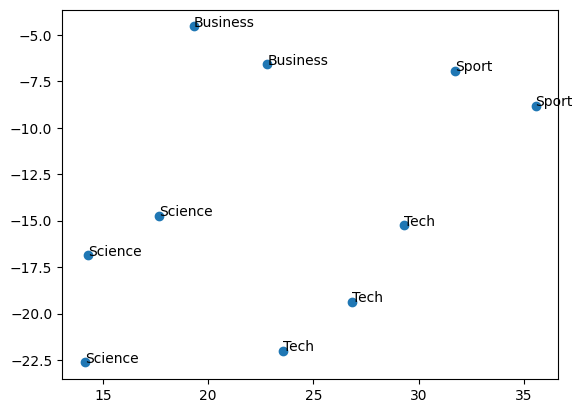

In [24]:
import matplotlib.pyplot as plt

plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1])

topics = [article['topic'] for article in articles]

for i, topic in enumerate(topics):
    plt.annotate(topic,(embeddings_2d[i,0], embeddings_2d[i,1]))

plt.show()